In [1]:
import time
start_full_code=time.time()

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

import xgboost
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv(r"train.csv")

print("Shape of Train Dataset : ",df_train.shape)

Shape of Train Dataset :  (54808, 14)


In [3]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
df_train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [6]:
df_train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
print(df_train['education'].value_counts())
print()
print(df_train['previous_year_rating'].value_counts())

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64


In [8]:
df_train['education']=df_train['education'].fillna(df_train['education'].mode()[0])
df_train['previous_year_rating']=df_train['previous_year_rating'].fillna(df_train['previous_year_rating'].mode()[0])

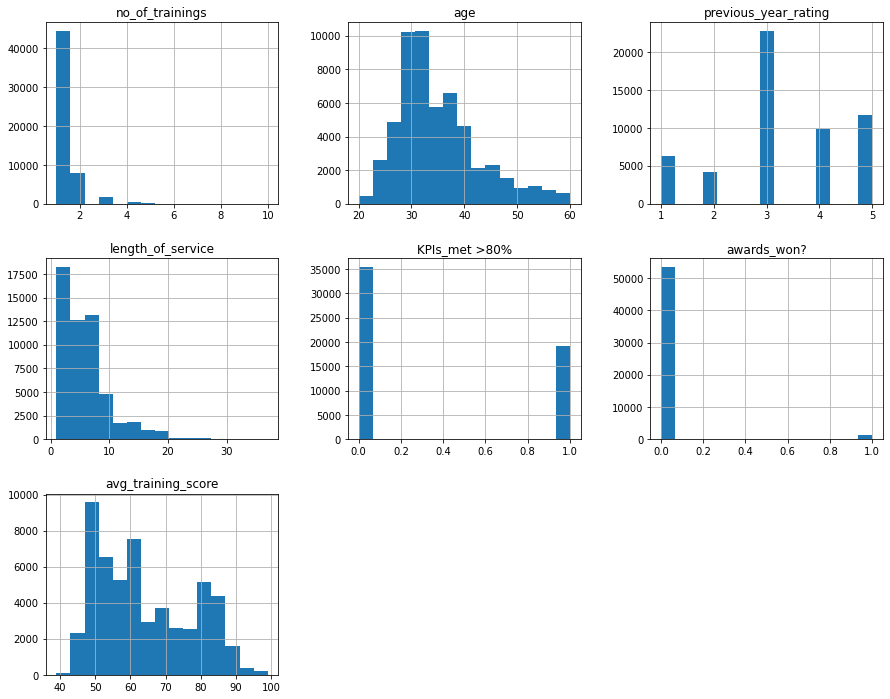

In [9]:
df_train.drop(['is_promoted','employee_id','department'], axis=1).hist(figsize=(15,12),bins = 15)
#plt.title("Features Distribution")
plt.show()

(array([ 4547.,  6684.,  7033., 17402., 11063.,  5732.,  2033.,   314.]),
 array([0.        , 0.45136474, 0.90272948, 1.35409422, 1.80545896,
        2.2568237 , 2.70818843, 3.15955317, 3.61091791]),
 <BarContainer object of 8 artists>)

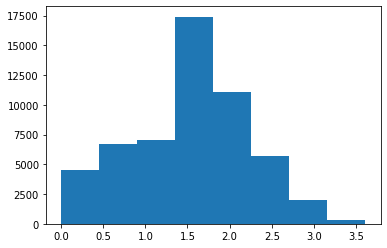

In [10]:
log_values=np.log(df_train['length_of_service'])
plt.hist(log_values,bins = 8)

In [11]:
df_train['length_of_service']=np.log(df_train['length_of_service'])

In [12]:
num_col = df_train.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df_train.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')
Categorical columns: 
 Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')


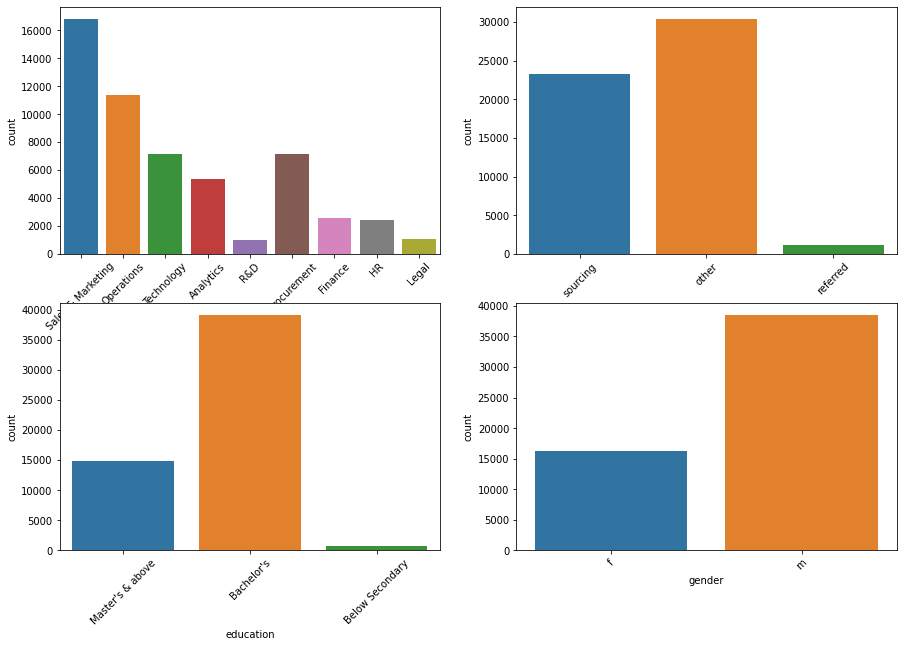

In [13]:
fig = plt.figure(figsize=(15,10))
columns=['department','recruitment_channel','education','gender']
plots=[i for i in range(1,5)]
for plot,column in zip(plots,columns):
    plt.subplot(2, 2, plot)
    sns.countplot(df_train[column])
    plt.xticks(rotation = 45)

In [14]:
# Which department gets most promotion
pd.crosstab(df_train['is_promoted'], df_train['department'])

department,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
is_promoted,,,,,,,,,
0,4840,2330,2282,986,10325,6450,930,15627,6370
1,512,206,136,53,1023,688,69,1213,768


In [15]:
# Which gender gets promoted most
pd.crosstab(df_train['is_promoted'], df_train['gender'])

gender,f,m
is_promoted,,
0,14845,35295
1,1467,3201


In [16]:
columns_to_show = ['avg_training_score', 'age', 
                    'length_of_service']

df_train.groupby(['is_promoted'])[columns_to_show].agg([np.mean, np.std, np.min,np.max])

avg_training_score                             age                 \
                          mean        std amin amax       mean       std amin   
is_promoted                                                                     
0                    62.647686  12.991969   39   96  34.844037  7.710679   20   
1                    71.325193  14.746122   41   99  34.372965  7.081449   20   

                 length_of_service                           
            amax              mean       std amin      amax  
is_promoted                                                  
0             60          1.519448  0.738660  0.0  3.610918  
1             60          1.503913  0.722813  0.0  3.526361

# Implementing First Algorithm

In [17]:
# Encoding string data labels to numeric values before fitting it in classifier.
from sklearn.preprocessing import LabelEncoder   
label_encoder = LabelEncoder() 
  
for col in cat_col:
    df_train[col]= label_encoder.fit_transform(df_train[col]) 

In [18]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,2.079442,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,1.386294,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,1.945910,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,2.302585,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,0.693147,0,0,73,0


In [19]:
#Seperating dependent and Independent variables.
X=df_train.drop(['employee_id','is_promoted'],axis=1)
y=df_train['is_promoted']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=5)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38365, 12)
(16443, 12)
(38365,)
(16443,)


In [21]:
#Random Forest
start_rf=time.time()

clf = RandomForestClassifier(n_estimators=50, max_depth= 5, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
print("\n Classification Report : \n",classification_report(y_test, y_pred))

Confusion Matrix : 
  [[15040     9]
 [ 1211   183]]

 Accuracy Score : 
  0.9258042936203855

 Classification Report : 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     15049
           1       0.95      0.13      0.23      1394

    accuracy                           0.93     16443
   macro avg       0.94      0.57      0.60     16443
weighted avg       0.93      0.93      0.90     16443



In [22]:
clf = RandomForestClassifier(n_estimators=100, max_depth= 10, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
print("\n Classification Report : \n",classification_report(y_test, y_pred))

Confusion Matrix : 
  [[15020    29]
 [ 1166   228]]

 Accuracy Score : 
  0.92732469743964

 Classification Report : 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     15049
           1       0.89      0.16      0.28      1394

    accuracy                           0.93     16443
   macro avg       0.91      0.58      0.62     16443
weighted avg       0.92      0.93      0.90     16443



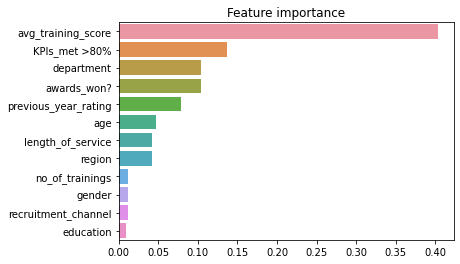

In [23]:
imp = pd.Series(data=clf.feature_importances_, index=['department', 'region', 'education', 'gender',
                                                             'recruitment_channel', 'no_of_trainings', 'age',
                                                             'previous_year_rating','length_of_service',
                                                             'KPIs_met >80%', 'awards_won?',
                                                             'avg_training_score']).sort_values(ascending=False)
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, orient='h')

In [24]:
rfclassifier = RandomForestClassifier()

# defining parameter range 
param_grid = { 'max_depth'   : [10,20,40],
               'n_estimators' : [100,200,300]
             }  
  
grid = GridSearchCV(rfclassifier, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ....max_depth=10, n_estimators=100;, score=0.928 total time=   1.0s
[CV 2/5] END ....max_depth=10, n_estimators=100;, score=0.927 total time=   1.1s
[CV 3/5] END ....max_depth=10, n_estimators=100;, score=0.926 total time=   1.1s
[CV 4/5] END ....max_depth=10, n_estimators=100;, score=0.926 total time=   1.1s
[CV 5/5] END ....max_depth=10, n_estimators=100;, score=0.927 total time=   1.2s
[CV 1/5] END ....max_depth=10, n_estimators=200;, score=0.927 total time=   2.4s
[CV 2/5] END ....max_depth=10, n_estimators=200;, score=0.927 total time=   2.3s
[CV 3/5] END ....max_depth=10, n_estimators=200;, score=0.926 total time=   2.3s
[CV 4/5] END ....max_depth=10, n_estimators=200;, score=0.926 total time=   2.3s
[CV 5/5] END ....max_depth=10, n_estimators=200;, score=0.928 total time=   2.2s
[CV 1/5] END ....max_depth=10, n_estimators=300;, score=0.927 total time=   3.4s
[CV 2/5] END ....max_depth=10, n_estimators=300;,

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 40],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [25]:
print(grid.best_params_) 
  
print(grid.best_estimator_)

{'max_depth': 20, 'n_estimators': 100}
RandomForestClassifier(max_depth=20)


In [26]:
# Prediction using best parameters
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print("Confusion Matrix : \n ",confusion_matrix(y_test, grid_predictions))
print("\n Accuracy Score : \n ",accuracy_score(y_test,grid_predictions))
print("\n Classification Report : \n",classification_report(y_test, grid_predictions))

random_forest_accuracy=accuracy_score(y_test,grid_predictions)

Confusion Matrix : 
  [[14988    61]
 [ 1020   374]]

 Accuracy Score : 
  0.9342577388554401

 Classification Report : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     15049
           1       0.86      0.27      0.41      1394

    accuracy                           0.93     16443
   macro avg       0.90      0.63      0.69     16443
weighted avg       0.93      0.93      0.92     16443



In [27]:
stop_rf=time.time()
rf_time=stop_rf-start_rf
print("Time taken for Random Forest Regressor=",rf_time)

Time taken for Random Forest Regressor= 139.1704318523407


In [28]:
#ANN using MLPClassifier
start_ann=time.time()



classifier = MLPClassifier(solver='sgd', alpha=0.001,hidden_layer_sizes=(2,10), random_state=1, activation="logistic",momentum=0.002)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [29]:

#accuracy_score(y_test,y_pred)*100
print("Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
print("\n Classification Report : \n",classification_report(y_test, y_pred))

Confusion Matrix : 
  [[15049     0]
 [ 1394     0]]

 Accuracy Score : 
  0.9152222830383749

 Classification Report : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     15049
           1       0.00      0.00      0.00      1394

    accuracy                           0.92     16443
   macro avg       0.46      0.50      0.48     16443
weighted avg       0.84      0.92      0.87     16443



In [30]:
classifier2 = MLPClassifier(solver='adam', alpha=0.001, hidden_layer_sizes=(100,10), random_state=1, activation="logistic",momentum=0.0002)
classifier2.fit(X_train, y_train)
#accuracy_score(y_test,classifier2.predict(X_test))*100
print("Confusion Matrix : \n ",confusion_matrix(y_test, classifier2.predict(X_test)))
print("\n Accuracy Score : \n ",accuracy_score(y_test,classifier2.predict(X_test)))
print("\n Classification Report : \n",classification_report(y_test, classifier2.predict(X_test)))

Confusion Matrix : 
  [[15000    49]
 [ 1018   376]]

 Accuracy Score : 
  0.9351091649942225

 Classification Report : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     15049
           1       0.88      0.27      0.41      1394

    accuracy                           0.94     16443
   macro avg       0.91      0.63      0.69     16443
weighted avg       0.93      0.94      0.92     16443



In [31]:
mlp = MLPClassifier(max_iter=100)
param_grid = [{
            'activation' : ['tanh','logistic'],
            'solver' : ['sgd', 'adam'],
            'hidden_layer_sizes': [(5,),(10,),(15,),(20,)]
        }]

In [32]:
clf = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid=[{'activation': ['tanh', 'logistic'],
                          'hidden_layer_sizes': [(5,), (10,), (15,), (20,)],
                          'solver': ['sgd', 'adam']}])

In [33]:
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'tanh', 'hidden_layer_sizes': (15,), 'solver': 'adam'}
0.915 (+/-0.000) for {'activation': 'tanh', 'hidden_layer_sizes': (5,), 'solver': 'sgd'}
0.916 (+/-0.003) for {'activation': 'tanh', 'hidden_layer_sizes': (5,), 'solver': 'adam'}
0.915 (+/-0.000) for {'activation': 'tanh', 'hidden_layer_sizes': (10,), 'solver': 'sgd'}
0.919 (+/-0.002) for {'activation': 'tanh', 'hidden_layer_sizes': (10,), 'solver': 'adam'}
0.915 (+/-0.000) for {'activation': 'tanh', 'hidden_layer_sizes': (15,), 'solver': 'sgd'}
0.921 (+/-0.002) for {'activation': 'tanh', 'hidden_layer_sizes': (15,), 'solver': 'adam'}
0.915 (+/-0.000) for {'activation': 'tanh', 'hidden_layer_sizes': (20,), 'solver': 'sgd'}
0.919 (+/-0.001) for {'activation': 'tanh', 'hidden_layer_sizes': (20,), 'solver': 'adam'}
0.915 (+/-0.000) for {'activation': 'logistic', 'hidden_layer_sizes': (5,), 'solver': 'sgd'}
0.916 (+/-0.003) for {'activation': 'logistic', 'hidden_layer_sizes': (5,), 'solver': 'adam

In [34]:
classifier3 = MLPClassifier(solver='adam', alpha=0.001, hidden_layer_sizes=(20,10), random_state=1, activation="tanh",momentum=0.0002)
classifier3.fit(X_train, y_train)
#accuracy_score(y_test,classifier2.predict(X_test))*100
print("Confusion Matrix : \n ",confusion_matrix(y_test,classifier3.predict(X_test)))
print("\n Accuracy Score : \n ",accuracy_score(y_test,classifier3.predict(X_test)))
print("\n Classification Report : \n",classification_report(y_test,classifier3.predict(X_test)))
ann_accuracy=accuracy_score(y_test,classifier3.predict(X_test))

Confusion Matrix : 
  [[14992    57]
 [ 1072   322]]

 Accuracy Score : 
  0.9313385635224716

 Classification Report : 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     15049
           1       0.85      0.23      0.36      1394

    accuracy                           0.93     16443
   macro avg       0.89      0.61      0.66     16443
weighted avg       0.93      0.93      0.91     16443



In [35]:
classifier4 = MLPClassifier(solver='adam', alpha=0.001, hidden_layer_sizes=(15,10), random_state=1, activation="logistic",momentum=0.0002)
classifier4.fit(X_train, y_train)
#accuracy_score(y_test,classifier2.predict(X_test))*100
print("Confusion Matrix : \n ",confusion_matrix(y_test,classifier4.predict(X_test)))
print("\n Accuracy Score : \n ",accuracy_score(y_test,classifier4.predict(X_test)))
print("\n Classification Report : \n",classification_report(y_test,classifier4.predict(X_test)))

Confusion Matrix : 
  [[15033    16]
 [ 1165   229]]

 Accuracy Score : 
  0.9281761235784224

 Classification Report : 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     15049
           1       0.93      0.16      0.28      1394

    accuracy                           0.93     16443
   macro avg       0.93      0.58      0.62     16443
weighted avg       0.93      0.93      0.90     16443



In [36]:
stop_ann=time.time()
ann_time=stop_ann-start_ann
print("Time taken for MLP Classifier=",ann_time)

Time taken for MLP Classifier= 62.31817626953125


In [37]:
#SVM
start_svm=time.time()

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
print("\n Classification Report : \n",classification_report(y_test, y_pred))
svm_accuracy=accuracy_score(y_test,y_pred)

stop_svm=time.time()
svm_time=stop_svm-start_svm
print("Time taken for SVM=",svm_time)

Confusion Matrix : 
  [[15049     0]
 [ 1394     0]]

 Accuracy Score : 
  0.9152222830383749

 Classification Report : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     15049
           1       0.00      0.00      0.00      1394

    accuracy                           0.92     16443
   macro avg       0.46      0.50      0.48     16443
weighted avg       0.84      0.92      0.87     16443

Time taken for SVM= 116.17568564414978


In [38]:
#XGBoost
start_xgb=time.time()



model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score : \n ",accuracy_score(y_test, y_pred))
print("\n Classification Report : \n",classification_report(y_test, y_pred))
xgb_accuracy=accuracy_score(y_test, y_pred)



[12:09:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix : 
  [[14986    63]
 [  920   474]]

 Accuracy Score : 
  0.9402177218269172

 Classification Report : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     15049
           1       0.88      0.34      0.49      1394

    accuracy                           0.94     16443
   macro avg       0.91      0.67      0.73     16443
weighted avg       0.94      0.94      0.93     16443



In [39]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [40]:
parameters = {
    'max_depth': [2,3],
    'n_estimators': [40,20],
    'learning_rate': [0.01, 0.05]
}

In [41]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[12:10:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scal

In [42]:
grid_search.best_estimator_
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 40}

In [43]:
grid_prediction_xgb=grid_search.predict(X_test)

print("Confusion Matrix : \n ",confusion_matrix(y_test, grid_prediction_xgb))
print("\n Accuracy Score : \n ",accuracy_score(y_test,grid_prediction_xgb))
print("\n Classification Report : \n",classification_report(y_test, grid_prediction_xgb))

stop_xgb=time.time()
xgb_time=stop_xgb-start_xgb
print("Time taken for XGBoost=",xgb_time)

Confusion Matrix : 
  [[15040     9]
 [ 1215   179]]

 Accuracy Score : 
  0.9255610290093049

 Classification Report : 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     15049
           1       0.95      0.13      0.23      1394

    accuracy                           0.93     16443
   macro avg       0.94      0.56      0.59     16443
weighted avg       0.93      0.93      0.90     16443

Time taken for XGBoost= 5.527985334396362


In [44]:
#Decision Tree
start_dtc=time.time()

max_depth=10
random_state=0
treeDTC = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
treeDTC.fit(X_train, y_train)
prediction = treeDTC.predict(X_test)

print("Confusion Matrix : \n ",confusion_matrix(y_test, prediction))
print("\n Accuracy Score : \n ",accuracy_score(y_test, prediction))
print("\n Classification Report : \n",classification_report(y_test, prediction))

dtc_accuracy=accuracy_score(y_test, prediction)

Confusion Matrix : 
  [[14950    99]
 [  993   401]]

 Accuracy Score : 
  0.933588761174968

 Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     15049
           1       0.80      0.29      0.42      1394

    accuracy                           0.93     16443
   macro avg       0.87      0.64      0.69     16443
weighted avg       0.93      0.93      0.92     16443



In [45]:
# Run decision tree classifier with higher depths
treeDTC_2 = DecisionTreeClassifier(max_depth=20, random_state=0)
treeDTC_2.fit(X_train, y_train)
prediction2 = treeDTC_2.predict(X_test)
#print("Accuracy: ", 100*accuracy_score(y_test, prediction2))
print("Confusion Matrix : \n ",confusion_matrix(y_test, prediction2))
print("\n Accuracy Score : \n ",accuracy_score(y_test, prediction2))
print("\n Classification Report : \n",classification_report(y_test, prediction2))

Confusion Matrix : 
  [[14463   586]
 [  851   543]]

 Accuracy Score : 
  0.9126071884692575

 Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     15049
           1       0.48      0.39      0.43      1394

    accuracy                           0.91     16443
   macro avg       0.71      0.68      0.69     16443
weighted avg       0.91      0.91      0.91     16443



In [46]:
treeDTC_3 = DecisionTreeClassifier(max_depth=40, random_state=0)
treeDTC_3.fit(X_train, y_train)
prediction3 = treeDTC_3.predict(X_test)
#print("Accuracy: ", 100*accuracy_score(y_test, prediction3))
print("Confusion Matrix : \n ",confusion_matrix(y_test, prediction3))
print("\n Accuracy Score : \n ",accuracy_score(y_test, prediction3))
print("\n Classification Report : \n",classification_report(y_test, prediction3))

Confusion Matrix : 
  [[14143   906]
 [  788   606]]

 Accuracy Score : 
  0.8969774372073223

 Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94     15049
           1       0.40      0.43      0.42      1394

    accuracy                           0.90     16443
   macro avg       0.67      0.69      0.68     16443
weighted avg       0.90      0.90      0.90     16443



In [47]:
# Pruning tree


parameters = [{'max_leaf_nodes':[2,3,4,5,6,7,8,9,10]}]
pruned_treeDTC = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
pruned_treeDTC.fit(X_train, y_train)

max_nodes = pruned_treeDTC.best_params_['max_leaf_nodes']
print('Max Leaf Nodes:',max_nodes)

Max Leaf Nodes: 10


[Text(443.8636363636364, 637.03125, 'X[11] <= 90.5\ngini = 0.156\nsamples = 38365\nvalue = [35091, 3274]\nclass = 0'),
 Text(317.0454545454545, 552.09375, 'X[9] <= 0.5\ngini = 0.142\nsamples = 37963\nvalue = [35036, 2927]\nclass = 0'),
 Text(253.63636363636363, 467.15625, 'X[10] <= 0.5\ngini = 0.069\nsamples = 24693\nvalue = [23805, 888]\nclass = 0'),
 Text(126.81818181818181, 382.21875, 'X[7] <= 4.5\ngini = 0.06\nsamples = 24432\nvalue = [23679, 753]\nclass = 0'),
 Text(63.40909090909091, 297.28125, 'gini = 0.04\nsamples = 21626\nvalue = [21188, 438]\nclass = 0'),
 Text(190.22727272727272, 297.28125, 'X[11] <= 63.5\ngini = 0.199\nsamples = 2806\nvalue = [2491, 315]\nclass = 0'),
 Text(126.81818181818181, 212.34375, 'gini = 0.052\nsamples = 1914\nvalue = [1863, 51]\nclass = 0'),
 Text(253.63636363636363, 212.34375, 'X[0] <= 0.5\ngini = 0.417\nsamples = 892\nvalue = [628, 264]\nclass = 0'),
 Text(190.22727272727272, 127.40625, 'gini = 0.215\nsamples = 351\nvalue = [308, 43]\nclass = 0')

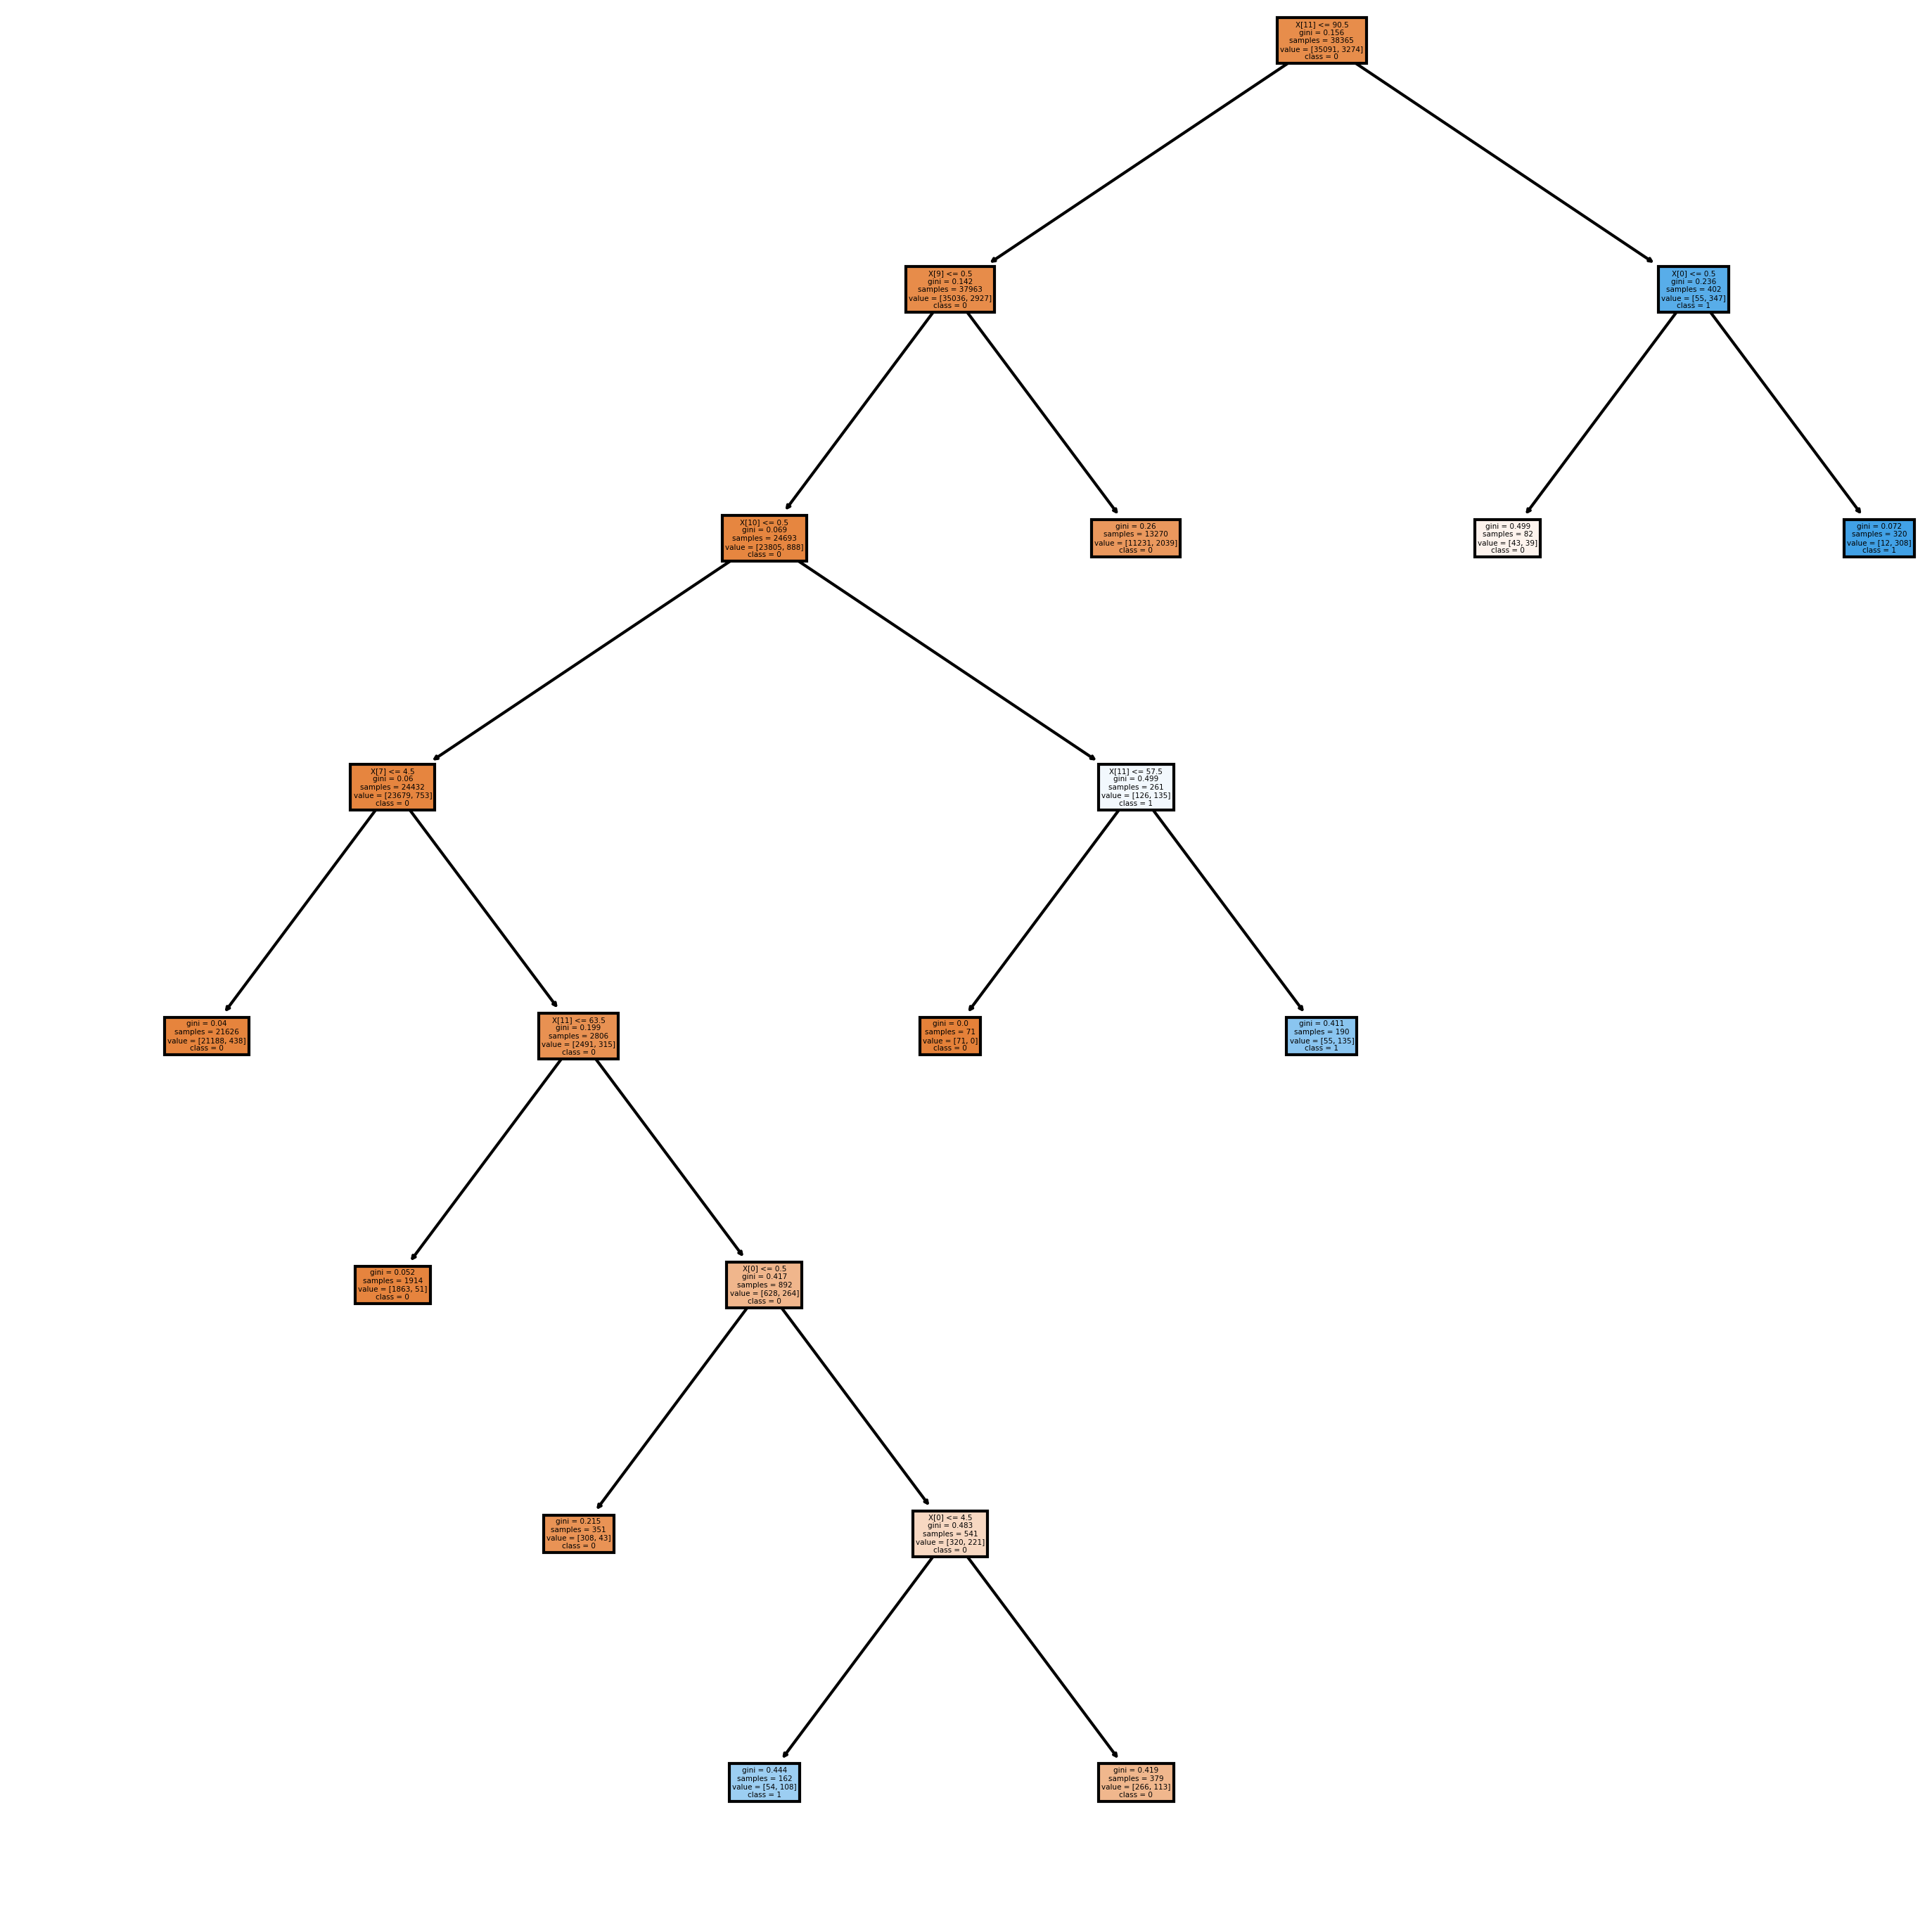

In [48]:
# Graph pruned tree
pruned_treeDTC = tree.DecisionTreeClassifier(max_depth=30, random_state=0, max_leaf_nodes = max_nodes)
pruned_treeDTC = pruned_treeDTC.fit(X_train, y_train)


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(pruned_treeDTC,
              class_names=['0','1'],
               filled = True)

In [49]:
# Pruned tree accuracy
prune_prediction = pruned_treeDTC.predict(X_test)
#print("Accuracy: ", 100*accuracy_score(y_test, prune_prediction))
print("Confusion Matrix : \n ",confusion_matrix(y_test, prune_prediction))
print("\n Accuracy Score : \n ",accuracy_score(y_test, prune_prediction))
print("\n Classification Report : \n",classification_report(y_test, prune_prediction))

Confusion Matrix : 
  [[14988    61]
 [ 1151   243]]

 Accuracy Score : 
  0.9262908228425469

 Classification Report : 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     15049
           1       0.80      0.17      0.29      1394

    accuracy                           0.93     16443
   macro avg       0.86      0.59      0.62     16443
weighted avg       0.92      0.93      0.90     16443



In [50]:
stop_dtc=time.time()
dtc_time=stop_dtc-start_dtc
print("Time taken for Decision Trees=",dtc_time)

Time taken for Decision Trees= 2.8657989501953125


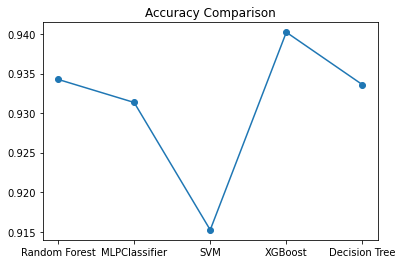

In [51]:
import matplotlib.pyplot as plt

names = ['Random Forest', 'MLPClassifier', 'SVM', 'XGBoost', 'Decision Tree']
values = [random_forest_accuracy,ann_accuracy,svm_accuracy,xgb_accuracy,dtc_accuracy]

#plt.figure(figsize=(9, 3))

#plt.subplot(131)

plt.title('Accuracy Comparison')
#plt.bar(bottom=0.6)
#plt.bar(names, values, bottom=0.6, height=1, width=1)
plt.scatter(names, values)

plt.plot(names,values)

plt.show()

In [52]:
stop_full_code=time.time()
full_code_time=stop_full_code-start_full_code
print("Total Runtime=",full_code_time/60)

Total Runtime= 5.47985961039861


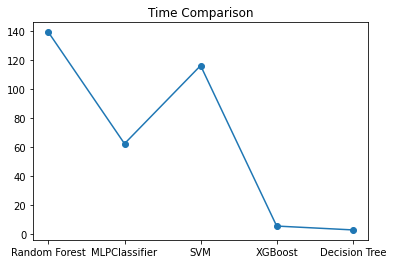

In [53]:
time_values=[rf_time, ann_time, svm_time, xgb_time, dtc_time]
plt.title('Time Comparison')

plt.scatter(names, time_values)

plt.plot(names,time_values)

plt.show()

## Selection of the best algorithm based on accuracy and time comparision.

In [54]:
accuracy_dict = {}
time_dict = {}
for obj, val in zip(names, values):
    accuracy_dict[obj] = val
for obj, time in zip(names, time_values):
    time_dict[time] = obj
print(sorted(time_dict.items())[:3])
top_3_fast = sorted(time_dict.items())[:3]
best_accuracy = []
for obj in top_3_fast:
    best_accuracy.append((accuracy_dict[obj[1]],obj[1]))
print(sorted(best_accuracy,reverse=True))
best_algo = sorted(best_accuracy, reverse=True)[0][1]
print("The best algorithm according to accuracy and time is: ",best_algo)

[(2.8657989501953125, 'Decision Tree'), (5.527985334396362, 'XGBoost'), (62.31817626953125, 'MLPClassifier')]
[(0.9402177218269172, 'XGBoost'), (0.933588761174968, 'Decision Tree'), (0.9313385635224716, 'MLPClassifier')]
The best algorithm according to accuracy and time is:  XGBoost
